In [150]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 0. Initial Data Loading and Exploration

## HDI

In [83]:
hdi_df = pd.read_csv('data/HDR21-22_Composite_indices_complete_time_series.csv')
hdi_df.sample(3)

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
193,ZMB,Zambia,Medium,SSA,154.0,0.412,0.408,0.408,0.414,0.411,...,4.74,4.68,3.92,3.36,3.12,3.21,2.80,2.38,2.38,2.38
166,SWZ,Eswatini (Kingdom of),Medium,SSA,144.0,0.545,0.543,0.540,0.532,0.523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,MRT,Mauritania,Medium,SSA,158.0,0.397,0.402,0.411,0.423,0.435,...,4.71,4.61,4.30,4.58,4.20,3.89,6.97,7.75,7.75,7.75


In [84]:
# Exploring the columns

# hdi_df.columns.tolist()

In [85]:
# Selecting the columns of interest
hdi_df = hdi_df[['country', 'hdicode', 'hdi_2021', 'region','hdi_rank_2021']]
hdi_df.head()

,country,hdicode,hdi_2021,region,hdi_rank_2021
0,Afghanistan,Low,0.478,SA,180.0
1,Angola,Medium,0.586,SSA,148.0
2,Albania,High,0.796,ECA,67.0
3,Andorra,Very High,0.858,NaN,40.0
4,United Arab Emirates,Very High,0.911,AS,26.0


In [86]:
# Renaming the columns so that they are easier to understand 
hdi_df.rename(columns={'hdi_2021': 'HDI',
                       'country': 'Country',
                       'hdicode': 'HDI Group',
                       'region': 'Region',
                       'hdi_rank_2021': 'HDI_Rank'}, inplace=True)    

In [87]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    206 non-null    object 
 1   HDI Group  191 non-null    object 
 2   HDI        202 non-null    float64
 3   Region     151 non-null    object 
 4   HDI_Rank   191 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.2+ KB


#### Lets look at the null values

In [88]:
# Looking at missing HDI values
hdi_df[hdi_df['HDI'].isnull()]

,Country,HDI Group,HDI,Region,HDI_Rank
108,Monaco,NaN,NaN,NaN,NaN
132,Nauru,NaN,NaN,EAP,NaN
142,Korea (Democratic People's Rep. of),NaN,NaN,EAP,NaN
158,Somalia,NaN,NaN,AS,NaN


We can drop these rows as they contain no real information

In [89]:
# Getting the regions (abbreviations)
hdi_df['Region'].value_counts()  

Region
SSA    46
LAC    33
EAP    26
AS     20
ECA    17
SA      9
Name: count, dtype: int64

As we can see we have 4 countries with missing HDI scores. These will have to be dropped as there would be no way to fill in the data for these cells (one could try to look for other datasets). We can also observe that there are summaries of the HDI scores by region. We save these in a separate dataframe so that we can have the data on the countries in one dataframe and the data about the regions in a separate one.

In [90]:
hdi_df_regions = hdi_df.tail(11)
hdi_df_regions

,Country,HDI Group,HDI,Region,HDI_Rank
195,Very high human development,NaN,0.896,NaN,NaN
196,High human development,NaN,0.754,NaN,NaN
197,Medium human development,NaN,0.636,NaN,NaN
198,Low human development,NaN,0.518,NaN,NaN
199,Arab States,NaN,0.708,NaN,NaN
200,East Asia and the Pacific,NaN,0.749,NaN,NaN
201,Europe and Central Asia,NaN,0.796,NaN,NaN
202,Latin America and the Caribbean,NaN,0.754,NaN,NaN
203,South Asia,NaN,0.632,NaN,NaN
204,Sub-Saharan Africa,NaN,0.547,NaN,NaN


In [91]:
hdi_df = hdi_df.drop(hdi_df.tail(11).index)
hdi_df.tail()

,Country,HDI Group,HDI,Region,HDI_Rank
190,Samoa,High,0.707,EAP,111.0
191,Yemen,Low,0.455,AS,183.0
192,South Africa,High,0.713,SSA,109.0
193,Zambia,Medium,0.565,SSA,154.0
194,Zimbabwe,Medium,0.593,SSA,146.0


In [92]:
# Lets drop the countries with NaN HDI values
hdi_df['HDI'].dropna(inplace=True)
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    195 non-null    object 
 1   HDI Group  191 non-null    object 
 2   HDI        191 non-null    float64
 3   Region     151 non-null    object 
 4   HDI_Rank   191 non-null    float64
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [93]:
# Dropping values which hVe NaN HDI values while ignoring region
hdi_df.dropna(subset=['HDI'], inplace=True)

In [94]:
# Lets set the countries as the index
hdi_df.set_index('Country', inplace=True)

In [95]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HDI Group  191 non-null    object 
 1   HDI        191 non-null    float64
 2   Region     148 non-null    object 
 3   HDI_Rank   191 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.5+ KB


In [113]:
hdi_df.describe()

,HDI,HDI_Rank
count,191.000000,191.000000
mean,0.720576,95.811518
std,0.150661,55.307333
min,0.385000,1.000000
25%,0.599500,48.500000
50%,0.739000,96.000000
75%,0.835000,143.500000
max,0.962000,191.000000


We won't drop the rows with null values in the 'Region' row as we can still use the HDI-value of these countries for non-regional analysis.

## IQ

In [96]:
iq_df = pd.read_csv('data/National_IQ.csv')
iq_df.sample(3)

,Rank,Country,Measured IQ,IQ data quality,SchAch,SA direct,SA scaled,SA data quality,Final IQ,Final IQ.1
84,86.0,Brazil,87.0,13.0,396.1,80.4,83.3,8.0,85.6,85.6
114,113.5,Syria,80.5,7.0,427.0,85.1,87.1,2.0,82,82.0
70,71.0,Mexico,88.0,8.0,431.2,85.8,87.6,8.0,87.8,87.8


In [97]:
iq_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             162 non-null    float64
 1   Country          204 non-null    object 
 2   Measured IQ      136 non-null    float64
 3   IQ data quality  137 non-null    float64
 4    SchAch          113 non-null    float64
 5   SA direct        111 non-null    float64
 6   SA scaled        112 non-null    float64
 7   SA data quality  112 non-null    float64
 8    Final IQ        204 non-null    object 
 9    Final IQ.1      204 non-null    float64
dtypes: float64(8), object(2)
memory usage: 16.1+ KB


The values which we are intersted in are ones which are easily interpretable, and relevant to the research question, which aim it is to compare the HDI scores with the IQ scores. To do this, the IQ, the Rank of the country and the country itself ought to be included. 

In [98]:
iq_df.columns

Index(['Rank', 'Country', 'Measured IQ', 'IQ data quality', ' SchAch',
       'SA direct', 'SA scaled', 'SA data quality', ' Final IQ',
       ' Final IQ.1'],
      dtype='object')

In [99]:
columns_of_interest = ['Rank','Country', ' Final IQ']
iq_df = iq_df[columns_of_interest]


In [100]:
iq_df = iq_df.rename(columns=
{' Final IQ': 'IQ',
'Rank': 'IQ_Rank'
})

Since we are searching for potential biases and other correlations between the variables it is crucial that all the IQ values used will be the actual reported ones. Because of this, along with the same methodlogy being applied for the HDI dataset, we have to drop the NaN values rows of the IQ column. 

In [101]:
iq_df['IQ'].dropna(inplace=True)

In [102]:
iq_df.set_index('Country',inplace=True)

In [103]:
iq_df

,IQ_Rank,IQ
Country,,
Singapore,1.0,107.1
China,2.0,105.8
Hong Kong,3.0,105.7
Korea: South,4.5,104.6
Taiwan,4.5,104.6
...,...,...
GuineaBissau,NaN,(69)
Liberia,NaN,(68)
Haiti,NaN,(67)


The values in brackets are estimated from the neighbouring countries

# 1. Cleaning the Data


# 1. Merge Data


In [104]:
outer_join_df = hdi_df.merge(iq_df, how='outer',on='Country')
outer_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, Afghanistan to Sao Tome & Principe
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HDI Group  191 non-null    object 
 1   HDI        191 non-null    float64
 2   Region     148 non-null    object 
 3   HDI_Rank   191 non-null    float64
 4   IQ_Rank    162 non-null    float64
 5   IQ         204 non-null    object 
dtypes: float64(3), object(3)
memory usage: 13.4+ KB


In [105]:
missing_in_hdi = outer_join_df[outer_join_df['HDI'].isnull()].index
missing_in_hdi = sorted(missing_in_hdi.tolist())
print("In IQ but missing in HDI: \n", missing_in_hdi)

missing_in_IQ = outer_join_df[outer_join_df['IQ'].isnull()].index
missing_in_IQ = sorted(missing_in_IQ.tolist())
print('In HDI but missing in IQ: \n', missing_in_IQ)
#A few countries on the list seem to have data for both data sets, but are named differently, which makes for the large amount of values (252)
iq_renaming = {
'(Serbia &) Montenegro' : 'Montenegro',
'Central African Rep.' : 'Central African Republic',
'CostaRica' : 'Costa Rica',
'GuineaBissau' : 'Guinea-Bissau',
'Myanmar/Burma' : 'Myanmar',
'Papua N.G.' : 'Papua New Guinea',
'CzechRep.' : 'Czechia',
'Macedonia' : 'North Macedonia'
}
hdi_renaming = {
    'Bolivia (Plurinational State of)' : 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia',
    'Brunei Darussalam' : 'Brunei',
    'Cabo Verde': 'Cape Verde',
    'Congo' : 'Congo (Brazzaville)',
    'Congo (Democratic Republic of the)' : 'Congo (Zaire)',
    'Hong Kong, China (SAR)' : 'Hong Kong',
    'Iran (Islamic Republic of)' : 'Iran', 
    "Lao People's Democratic Republic" : 'Laos',
    'Moldova (Republic of)' : 'Moldova',
    'Palestine, State of' : 'Palestine',
    'Russian Federation': 'Russia',
    "Côte d'Ivoire": "Cote d'Ivoire",

}
iq_df = iq_df.rename(index = iq_renaming)
hdi_df = hdi_df.rename(index = hdi_renaming)


In IQ but missing in HDI: 
 ['(Serbia &) Montenegro', 'Antigua/Barbuda', 'Bermuda', 'Bolivia', 'Bosnia', 'Brunei', 'Cape Verde', 'Central African Rep.', 'Congo (Brazzaville)', 'Congo (Zaire)', 'Cook Islands', 'CostaRica', "Cote d'Ivoire", 'CzechRep.', 'EastTimor', 'England', 'Greenland', 'GuineaBissau', 'Hong Kong', 'Iran', 'Korea: North', 'Korea: South', 'Laos', 'Macao', 'Macedonia', 'Mariana Islands', 'Micronesia', 'Moldova', 'Myanmar/Burma', 'Netherlands Antilles', 'New Caledonia', 'Palestine', 'Papua N.G.', 'Puerto Rico', 'Russia', 'Samoa (Western)', 'Sao Tome & Principe', 'Scotland', 'Serbia & (Montenegro)', 'Somalia', 'St  Helena', 'St Kitts & Nevis', 'St Lucia', 'St Vincent', 'Swaziland', 'Syria', 'Taiwan', 'Tanzania', 'Tibet', 'Trinidad & Tobago', 'USA', 'Venezuela', 'Vietnam', 'Zanzibar']
In HDI but missing in IQ: 
 ['Antigua and Barbuda', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Brunei Darussalam', 'Cabo Verde', 'Central African Republic', 'Congo', 'Cong

In [106]:

outer_join_df = hdi_df.merge(iq_df, how='outer',on='Country')
missing_in_hdi = outer_join_df[outer_join_df['HDI'].isnull()].index
missing_in_hdi = sorted(missing_in_hdi.tolist())
print("In IQ but missing in HDI: \n", missing_in_hdi)

missing_in_IQ = outer_join_df[outer_join_df['IQ'].isnull()].index
missing_in_IQ = sorted(missing_in_IQ.tolist())
print('In HDI but missing in IQ: \n', missing_in_IQ)

In IQ but missing in HDI: 
 ['Antigua/Barbuda', 'Bermuda', 'Cook Islands', 'EastTimor', 'England', 'Greenland', 'Korea: North', 'Korea: South', 'Macao', 'Mariana Islands', 'Micronesia', 'Netherlands Antilles', 'New Caledonia', 'Puerto Rico', 'Samoa (Western)', 'Sao Tome & Principe', 'Scotland', 'Serbia & (Montenegro)', 'Somalia', 'St  Helena', 'St Kitts & Nevis', 'St Lucia', 'St Vincent', 'Swaziland', 'Syria', 'Taiwan', 'Tanzania', 'Tibet', 'Trinidad & Tobago', 'USA', 'Venezuela', 'Vietnam', 'Zanzibar']
In HDI but missing in IQ: 
 ['Antigua and Barbuda', 'Eswatini (Kingdom of)', 'Korea (Republic of)', 'Micronesia (Federated States of)', 'Palau', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Serbia', 'South Sudan', 'Syrian Arab Republic', 'Tanzania (United Republic of)', 'Timor-Leste', 'Trinidad and Tobago', 'Tuvalu', 'United States', 'Venezuela (Bolivarian Republic of)', 'Viet Nam']


In [107]:
merged_df = outer_join_df.copy()

In [108]:
# Countries with NO IQ values
nan_indices = merged_df[merged_df['IQ'].isnull()].index
print(nan_indices)


Index(['Antigua and Barbuda', 'Micronesia (Federated States of)',
       'Saint Kitts and Nevis', 'Korea (Republic of)', 'Saint Lucia', 'Palau',
       'San Marino', 'Serbia', 'South Sudan', 'Sao Tome and Principe',
       'Eswatini (Kingdom of)', 'Syrian Arab Republic', 'Timor-Leste',
       'Trinidad and Tobago', 'Tuvalu', 'Tanzania (United Republic of)',
       'United States', 'Saint Vincent and the Grenadines',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Samoa'],
      dtype='object', name='Country')


# 2. INTRODUCTION

*In the introduction, provide the description of the problem addressed (the context of your data) and the project objectives.
Very briefly describe the analysis design and how it accomplishes the stated objectives. 
State your research hypotheses in a human-understandable language.
What  can the results be used for?*

**Data**  
The Data includes all countries (indices) and their global rank as well as value of their Human Development Index and Average IQ from the year 2021. The Data was merged from two distrinct databases, first the HDI data was sourced from the United Nations Development Program, short UNDP, public databases, the second IQ Data __ INSERT SOURCE __.

**Problem**
This projects aims to invetigate the correlation of IQ and HDI in different countries and regions of the world.

**Hypotheses**
Average Country IQ and Human Dvelopment Index are positively correlated.
Data is mainly missing in third world countries and less developed regions.

**Analysis Design**
The Design is to first merge the two sources into one comprehensive Pandas Dataframe. After furter preperation and cleaning of the Data, we plan to do deailed univariate analysis
such as ...
....
followed by bivariate analysis from
...

**What the results can be used for**
The result can be used by legislators to asses their countries position, in perspective of wheter they are under or overperforming in terms of IQ. This means that if a cuntries IQ is lower than to other countries with similar HDI, they should aim to set goals in terms of education, mental fitness, etc. to improve their AVG Iq in the long run.

# 3. DATA CLEANING AND PREPARATION

What did you need to do to clean and prepare your dataset?
Missing values, duplicates, inconsistent data types…


# 4.  DESCRIPTIVE STATISTICS

## 4.1  Univariate analysis
Histogram and metrics introduced in class. Outliers identification. Interpret and discuss your results.

### 4.1.1 HDI

In [180]:
hdi_df_regions.tail(7).head(6)

,Country,HDI Group,HDI,Region,HDI_Rank
199,Arab States,NaN,0.708,NaN,NaN
200,East Asia and the Pacific,NaN,0.749,NaN,NaN
201,Europe and Central Asia,NaN,0.796,NaN,NaN
202,Latin America and the Caribbean,NaN,0.754,NaN,NaN
203,South Asia,NaN,0.632,NaN,NaN
204,Sub-Saharan Africa,NaN,0.547,NaN,NaN


In [172]:
float(hdi_df_regions[hdi_df_regions['Country'] == 'Arab States']['HDI'])

/var/folders/qc/7382bn3j7vq46cnb3_4lsqk40000gn/T/ipykernel_48750/1464275638.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(hdi_df_regions[hdi_df_regions['Country'] == 'Arab States']['HDI'])


0.708

# I will finish later

In [192]:
custom_color_palette = ['red', 'green', 'orange', 'pink', 'purple', 'brown']

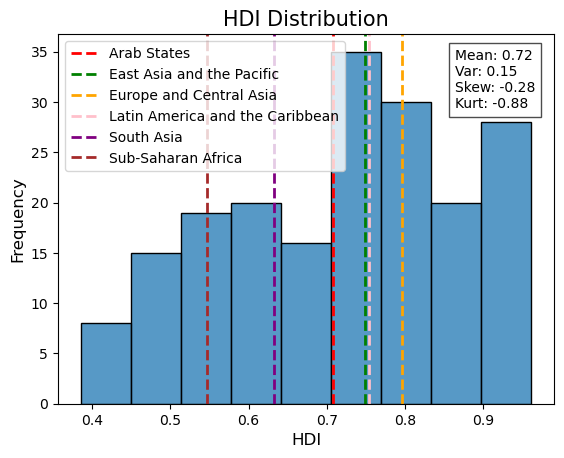

In [200]:
colors = dict(zip(hdi_df_regions.tail(7).head(6)['Country'], custom_color_palette))

sns.histplot(hdi_df['HDI'])
mean_hdi, standard_dev_hdi, skewness_hdi, kurtosis_hdi = hdi_df['HDI'].mean(), hdi_df['HDI'].std(), skew(hdi_df['HDI']), kurtosis(hdi_df['HDI'])
for _, region in hdi_df_regions.tail(7).head(6).iterrows():  
    plt.axvline(float(region['HDI']), color=colors[region['Country']], linestyle='dashed', linewidth=2, label=region['Country'])
plt.text(0.8, 0.8, 'Mean: {:.2f}'.format(mean_hdi)+ '\n'+ 'Var: {:.2f}'.format(standard_dev_hdi)+ '\n'+ 'Skew: {:.2f}'.format(skewness_hdi)+ '\n'+ 'Kurt: {:.2f}'.format(kurtosis_hdi), 
             transform=plt.gca().transAxes, fontsize=10,  bbox=dict(facecolor='white', alpha=0.7))
plt.title('HDI Distribution', fontsize=15)
plt.xlabel('HDI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

In [121]:
# Creating color palette for the regions
region_col = hdi_df["Region"].unique()
color_dict = dict(zip(region_col, sns.color_palette("muted", len(region_col))))

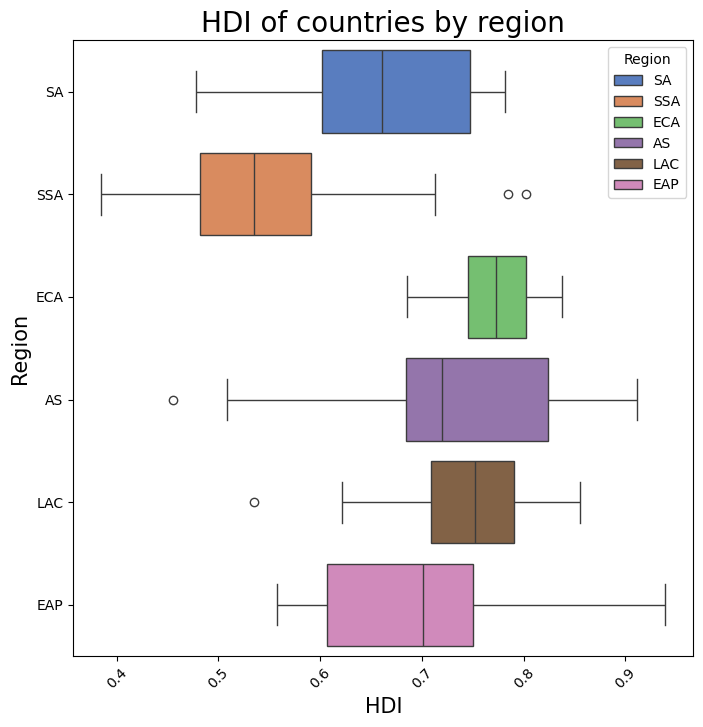

In [127]:
# Create a boxplot for the HDI of the countries sorted by region
plt.figure(figsize=(8,8))
sns.boxplot(data=hdi_df, x='HDI', y='Region', hue = 'Region', palette=color_dict)
# Increase font of the title and the labels
plt.title('HDI of countries by region', fontsize=20)
plt.xlabel('HDI', fontsize=15)
plt.ylabel('Region', fontsize=15)
plt.xticks(rotation=45)
plt.show()

As we can see we have a couple of ouliers. Lets look at them separately:

In [130]:
hdi_df[hdi_df['Region'] == 'SSA'].sort_values(by='HDI', ascending=False).head(4)

,HDI Group,HDI,Region,HDI_Rank
Country,,,,
Mauritius,Very High,0.802,SSA,63.0
Seychelles,High,0.785,SSA,72.0
South Africa,High,0.713,SSA,109.0
Gabon,High,0.706,SSA,112.0


The HDI of the Seychelles and the HDI of Mauritius is 10-15% higher than the HDI of the next best country.

In [131]:
# Look at the IQ of these countries relatively to the Regions

In [137]:
hdi_df[hdi_df['Region'] == 'AS'].sort_values(by='HDI', ascending=False).tail(4)

,HDI Group,HDI,Region,HDI_Rank
Country,,,,
Syrian Arab Republic,Medium,0.577,AS,150.0
Djibouti,Low,0.509,AS,171.0
Sudan,Low,0.508,AS,172.0
Yemen,Low,0.455,AS,183.0


The HDI of Yemen is about 10% lower than the HDI of the next lowest country.

In [136]:
hdi_df[hdi_df['Region'] == 'LAC'].sort_values(by='HDI', ascending=False).tail(4)

,HDI Group,HDI,Region,HDI_Rank
Country,,,,
Nicaragua,Medium,0.667,LAC,126.0
Guatemala,Medium,0.627,LAC,135.0
Honduras,Medium,0.621,LAC,137.0
Haiti,Low,0.535,LAC,163.0


The HDI of Haiti is abou 15% lower than the HDI of the next lowest country.

## 4.2  Bivariate analysis
Scatter plots and correlation for pairs of variables of interest. Interpret and discuss your results.


# 5.  DISCUSSION AND PRELIMINARY CONCLUSIONS 

Discuss the initial insights and how they align with the objectives set in the Introduction. Briefly address any limitations or challenges encountered in the data or analysis. Reflect on the implications of these findings and how they might guide future research directions or applications
